# Pattern Recognition: Default of Credit Card Clients

## Introduction

When clients are unable to pay their credit card debts, banks incur financial losses. 
Predicting whether a client will default on their obligations can be done with a binary classification. 
This report aims to describe the process undertaken in the simple classifiers that determine if a client is likely to repay their credit card debt or not.

# Getting Started

In this project it was used Python frameworks to create classifier and feature reduction models, perform data transformation, and generate visual plots. Specifically, we relied on scikit-learn for building classifier models and conducting feature selection. Pandas was employed for data manipulation tasks such as cleaning and preprocessing, while matplotlib and seaborn were used for visualization purposes. 

## Requirements

In [ ]:
%pip install pandas numpy matplotlib seaborn 
!pip install scikit-learn
%pip install imbalanced-learn

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.stats import kstest, kruskal

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Data

In [2]:
INPUT_PATH = '../data/credit_card_clients.csv'
data = pd.read_csv(INPUT_PATH)

data.rename(columns={'default payment next month': 'target'}, inplace=True)
data.drop(["ID"], axis=1, inplace=True)

display("Total rows: " + str(len(data)))
display("Columns: " + ", ".join(list(map(str, data.columns))))
display(data.head(10))

'Total rows: 30000'

'Columns: LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, target'

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
y = data['target'].copy()
X = data.copy()
X.drop(['target'], axis=1, inplace=True)


The dataset used in this study has **30000 observations**  that represent the diferents clients. Each observation has **24 features**: 

The first group is informations about the client:
- ID: id of client
- LIMIT_BAL: the amount of credit
- SEX: the gender (1=male, 2=female)
- EDUCATION: the level of education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE:  (1=married, 2=single, 3=others)
- AGE: the age

The second group is the history of past monthly payment (tells about delay of the past payments):
- PAY_0: the repayment status in September 2005
- PAY_2: the repayment status in August 2005
- PAY_3: the repayment status in July 2005
- PAY_4: the repayment status in June 2005
- PAY_5: the repayment status in May 2005
- PAY_6: the repayment status in April 2005

The measurement scale for the repayment status is: 
- -1: pay duly; 
- 1: payment delay for one month; 
- 2: payment delay for two months; 
- ...; 
- 8: payment delay for eight months; 
- 9: payment delay for nine months and above.

The fird group is the amount of bill statement:
- BILL_AMT1: Amount of bill statement in September, 2005
- BILL_AMT2: Amount of bill statement in August, 2005
- BILL_AMT3: Amount of bill statement in July, 2005
- BILL_AMT4: Amount of bill statement in June, 2005
- BILL_AMT5: Amount of bill statement in May, 2005
- BILL_AMT6: Amount of bill statement in April, 2005

The forth group consider the amount of previous payment:
- PAY_AMT1: Amount of previous payment in September, 2005
- PAY_AMT2: Amount of previous payment in August, 2005
- PAY_AMT3: Amount of previous payment in July, 2005
- PAY_AMT4: Amount of previous payment in June, 2005
- PAY_AMT5: Amount of previous payment in May, 2005
- PAY_AMT6: Amount of previous payment in April, 2005

Just for a question of simplicity the last feature labled by default **payment next month**, it was renamed to **target**.

The measurement scale for class is: 
- (1=non-defaulters, 0=defaulters)

### Data Filtering
Before proceeding with any data visualization or processing, it's essential to check for missing values within the dataset. If any missing values are detected, the data will be filtered accordingly.

It's evident that all cells are fully completed, indicating the absence of any missing values. Therefore, there is no need for filtering or data manipulation due to missing values.

In [4]:
data.isna().sum().T

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

### Data Normalization

Standardization of a dataset is a common requirement for many machine learning tasks.
With the data normalization concern, the `StandardScaler` method was used. It standardize features by removing the mean and caling to unit variance.

The standerd score of a sample `x` is calculates as:
$$ z = \frac{x-\mu}{\sigma}$$
Where:
- x is the original value of the sample.
- μ is the mean of the feature across the dataset.
- σ is the standard deviation of the feature across the dataset.

In [5]:
scaler =  StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Exploratory Data Analysis

Understanding the distribution of data is crucial for selecting appropriate models and techniques to apply to the data.

First thing first, let us see the class distribuition. It is evident that there is an imbalance between the classes. Ideally, a perfect balance would follow a 50/50 distribution between classes. However, in our dataset, we observe a distribution of 22% for class 1 and 78% for class 0.

This imbalance in class distribution may impact the performance of certain machine learning algorithms, particularly those sensitive to class imbalance. Therefore, it's important to address this issue during model training and evaluation to ensure robust and reliable results.

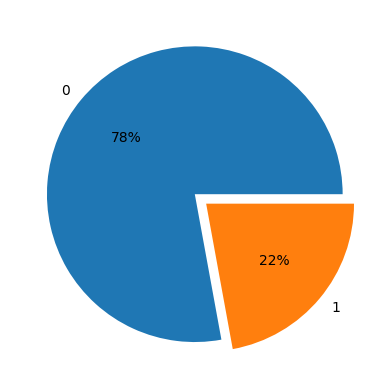

'Perc. of class 1: 22.12 %'

In [6]:
plt.figure()

values = data['target'].value_counts()
keys = [0, 1]
explode = [0, 0.1]
plt.pie(values, labels=keys, explode=explode, autopct='%.0f%%')

plt.show()

display("Perc. of class 1: " + str(data['target'].sum() / data.shape[0] * 100) + " %")

#### K-S Test
The Kolmogorov-Smirnov statistic test is commonly used to compare data to a normal standard distribution. 
It is possible to say the K-S test may not be the correct test to apply due the results obtained.

In [8]:
ks_statistic = []
p_value = []
for feature in X.columns:
    ks, p= kstest(X[feature], 'norm')
    ks_statistic.append(ks)
    p_value.append(p)
print(X.columns)
print(ks_statistic)
print(p_value)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
[0.115112967654111, 0.3948094340230941, 0.24725638863894117, 0.3476075931282819, 0.09440123896362657, 0.26680506063616516, 0.3075829925981671, 0.3043451619381855, 0.30814591279120274, 0.30820343204121703, 0.2974476947239121, 0.2366617340063037, 0.23686533499280138, 0.2399627335990372, 0.24081271192600953, 0.2434495083469547, 0.24576619130695798, 0.36619741408756495, 0.3985934322501699, 0.38330911635361176, 0.3790173640730474, 0.3767088296491745, 0.38461506904495213]
[0.0, 0.0, 0.0, 0.0, 3.962027152617041e-233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### K-W Test
Since the dataset does not follow a normal distribution, it's appropriate to explore non-parametric statistical tests.

By applying the Kruskal-Wallis test to our dataset, we can rank the features based on their importance. Features with higher test statistics and lower p-values indicate greater significance in differentiating between classes.

In [10]:
rank = [ (feature, kruskal(X[feature], y)[0]) for feature in X.columns ]
rank.sort(key=lambda x: x[1], reverse=True)

print("K-W Feature ranking:\n" + "\n".join(f"{feature:<10} | {h_stat:.2f}" for feature, h_stat in rank))

K-W Feature ranking:
PAY_AMT6   | 23702.21
PAY_AMT3   | 21591.27
PAY_AMT2   | 20982.74
PAY_AMT4   | 19374.24
PAY_AMT1   | 19270.67
PAY_AMT5   | 19210.45
BILL_AMT6  | 10893.89
BILL_AMT5  | 10809.71
BILL_AMT1  | 10608.73
BILL_AMT4  | 10216.06
BILL_AMT2  | 9874.18
BILL_AMT3  | 9671.52
LIMIT_BAL  | 3102.06
AGE        | 2694.41
PAY_0      | 1331.28
MARRIAGE   | 1108.18
PAY_2      | 615.24
PAY_3      | 482.09
PAY_4      | 382.74
EDUCATION  | 365.70
PAY_5      | 297.08
SEX        | 176.91
PAY_6      | 126.67


By plotting the rankings of features against their importance scores we can observe the point at which the curve stabilizes or flattens out. 
This point suggests that additional features beyond this point may not contribute significantly to the classification.
Following this thought the last eleven features in the previous features leaderboard can be deleted.

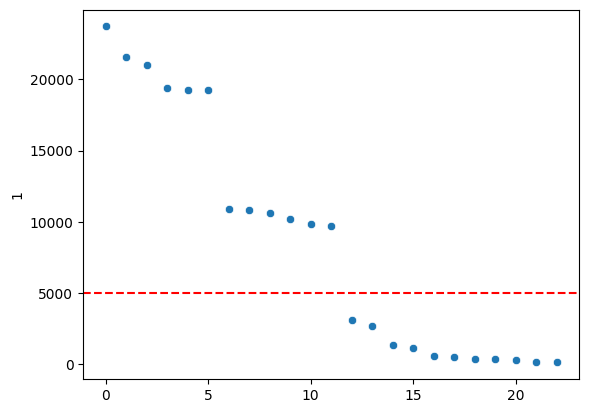

In [19]:
rank = pd.DataFrame(rank)
plt.figure()
sb.scatterplot(rank[1])
plt.axhline(y = 5000, color='r', linestyle='--')
plt.show()

#### Feature Distribution
Examining the follow plots can reveal important patterns, such as whether certain features exhibit distinct distributions for different classes, indicating their potential importance for classification. Additionally, these plots can highlight any overlap or separation between classes, which impacts the feasibility and accuracy of classification algorithms.

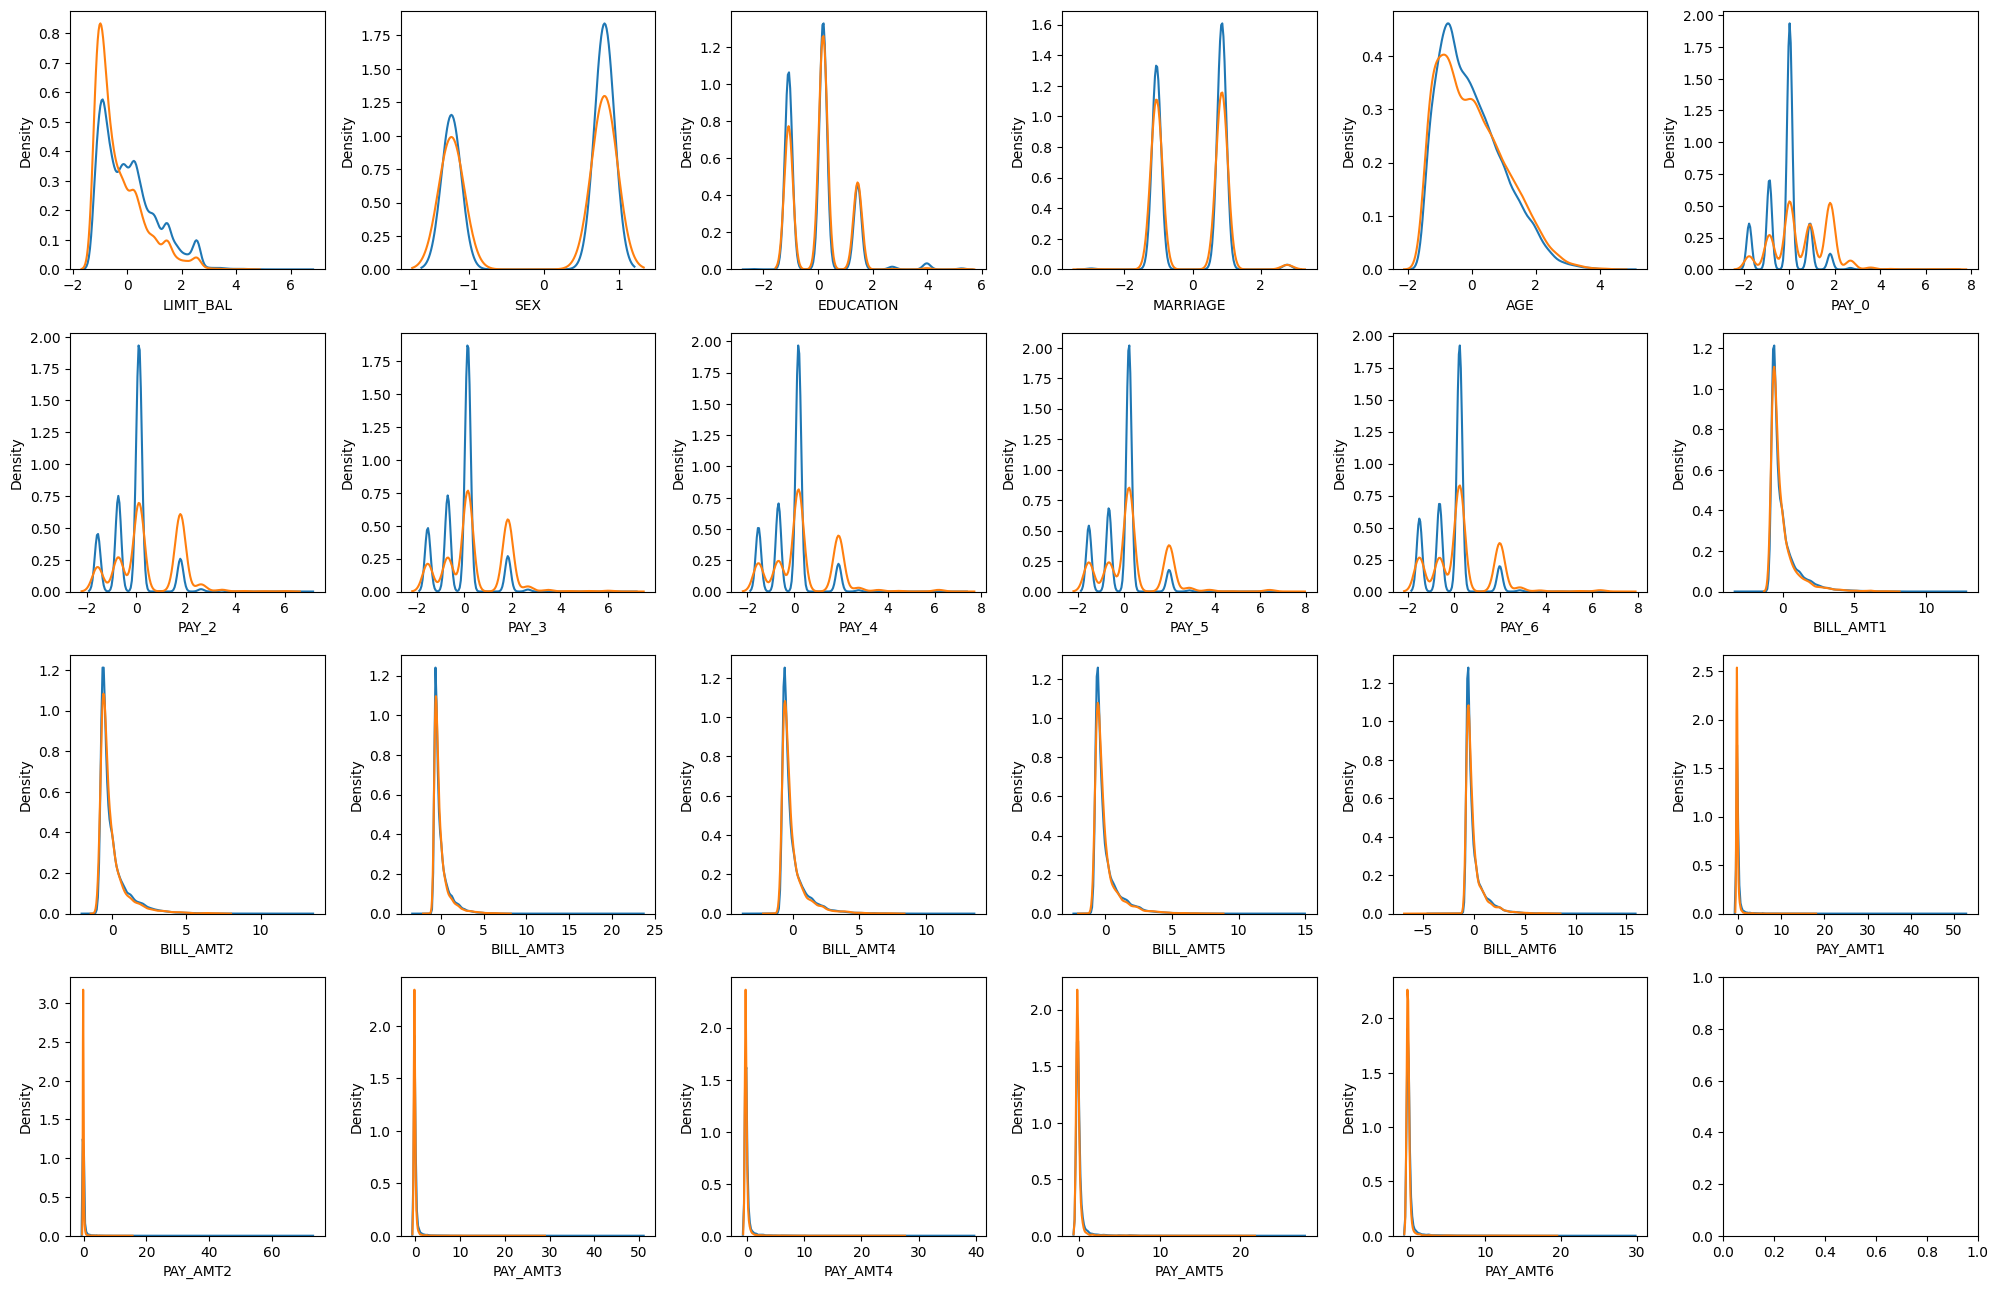

In [11]:
fig, axes = plt.subplots(4, 6, figsize=(20, 13))

for i in range(len(X.columns)):
    sb.kdeplot(ax=axes[i//6, i%6], data=X[y == 0][X.columns[i]])
    sb.kdeplot(ax=axes[i//6, i%6], data=X[y == 1][X.columns[i]])

plt.tight_layout()
plt.show()

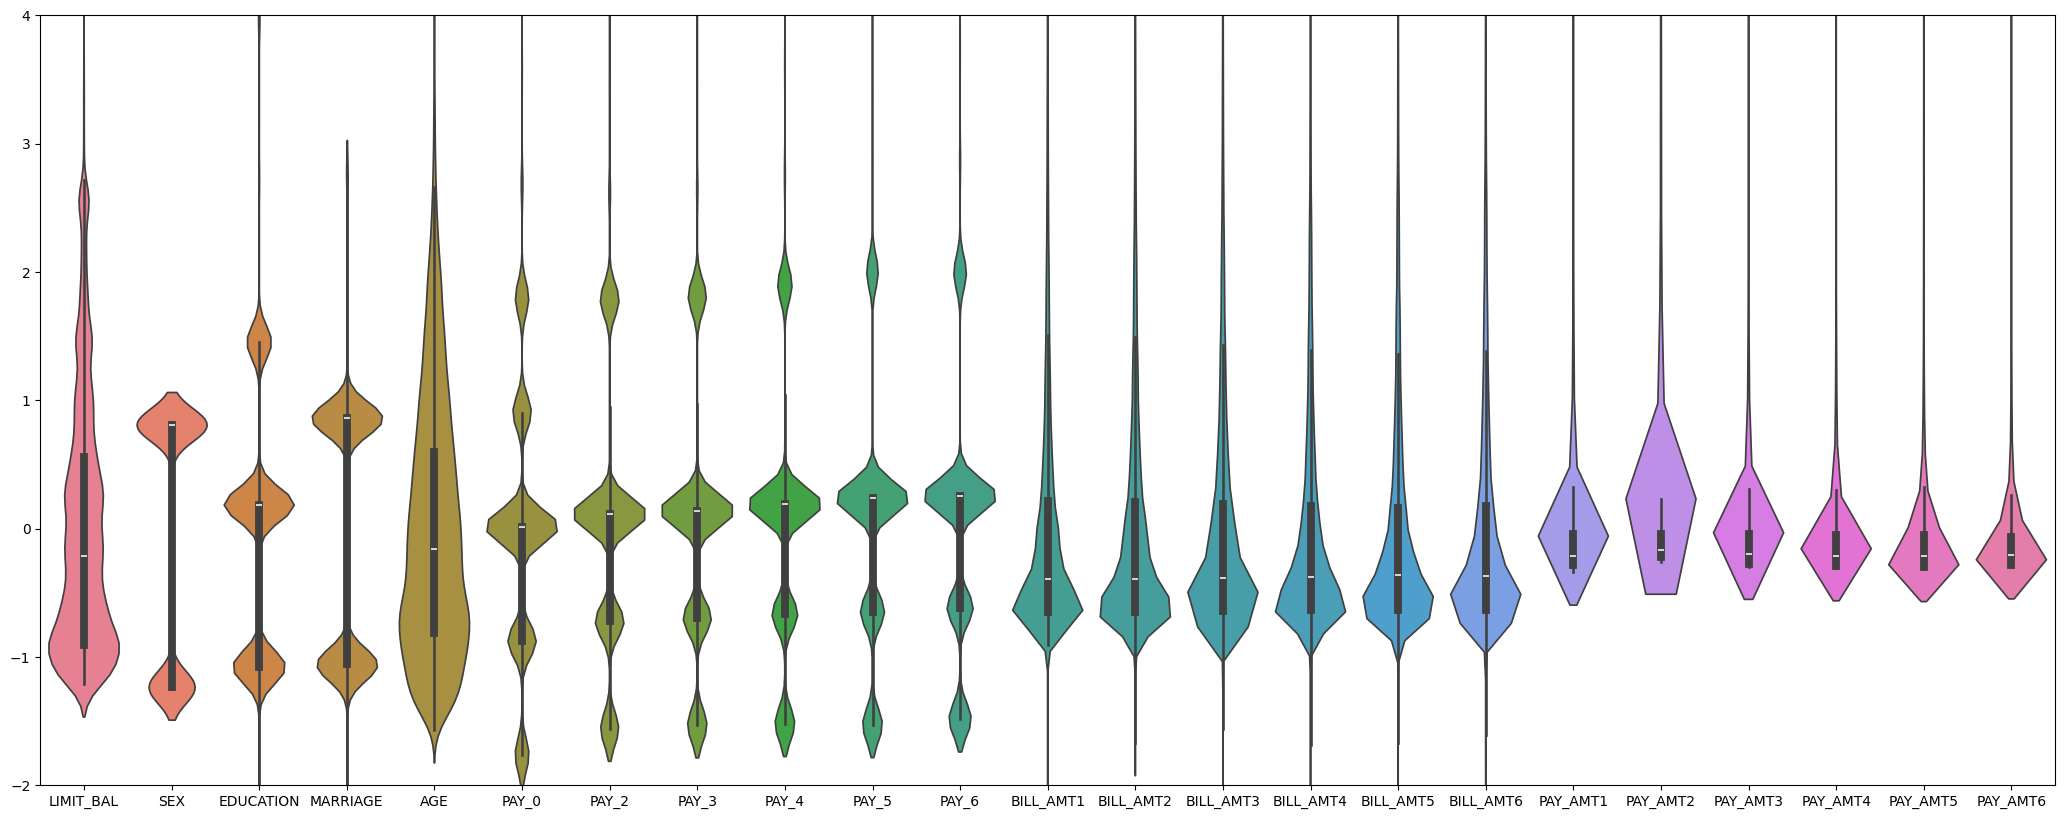

In [20]:
plt.figure(figsize=(26,10))

sb.violinplot(X)

plt.ylim(-2, 4)
plt.show()

#### Feature Correlation
The last tool I bring is the correlation matrix. It is a powerful technique that allows us to understand how the data is correlated by feature.

The most clear cells say there is a strong correlation.
If you carefully analise the plot, you can see that certain features such as the BILL_AMT variables are often highly correlated, indicating redundancy in the information they provide.

Moreover, examining the correlation between the target and the PAY feature, which represents payment status, is insightful. A strong correlation between the PAY feature and the target variable suggests that payment behavior is a significant predictor of credit card default. For instance, if a client frequently delays payments (PAY feature), it may indicate a higher likelihood of defaulting on credit card obligations and vice-versa.

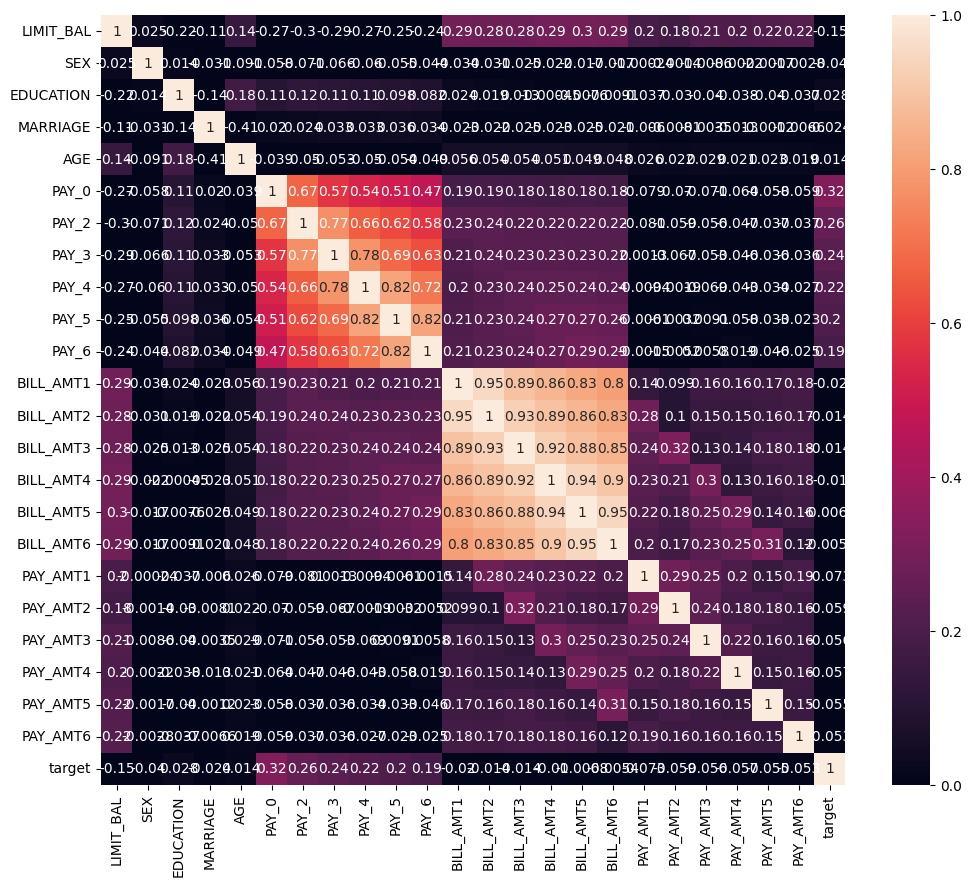

In [12]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(corr, annot=True, vmin=0.0)
plt.show()

## Feature Selection and Reduction

As observed in the previous section, the dataset contains redundant information, which can impede the effectiveness of classification algorithms. To address this issue and improve classification performance, various approaches will be applied to select the most important features and reduce redundant data.

Throughout this section, we will explore different approaches:
- PCA
- LDA

### Principal Component Analysis
The PCA aims to find a reduced set of new variables with less redundant information while minimizing the loss information.

This approach is based on data projection. PCA examines the data distribution and projects it onto the most variant direction.
On one hand, it's evident that data can be projected onto any dimension. On the other hand, if we reduce the dimensions too much, valuable data information may be lost - curse of dimensionality.
For this reason, we should carefully analyze which features can be eliminated.

In [34]:
exp_pca = PCA(n_components=X.shape[1])
exp_pca.fit(X)

eigenvalue = pd.DataFrame(exp_pca.explained_variance_ratio_)
index_lambda = list(range(eigenvalue.shape[0]))
R = lambda i: eigenvalue[0][index_lambda[:i]].pow(2).sum() / eigenvalue[0].pow(2).sum() * 100
preserved_variance = pd.DataFrame([R(i+1) for i in index_lambda])

The follow charts plots the percentage of information preserved and eigenvalues distribution.
TODO: Finish the description

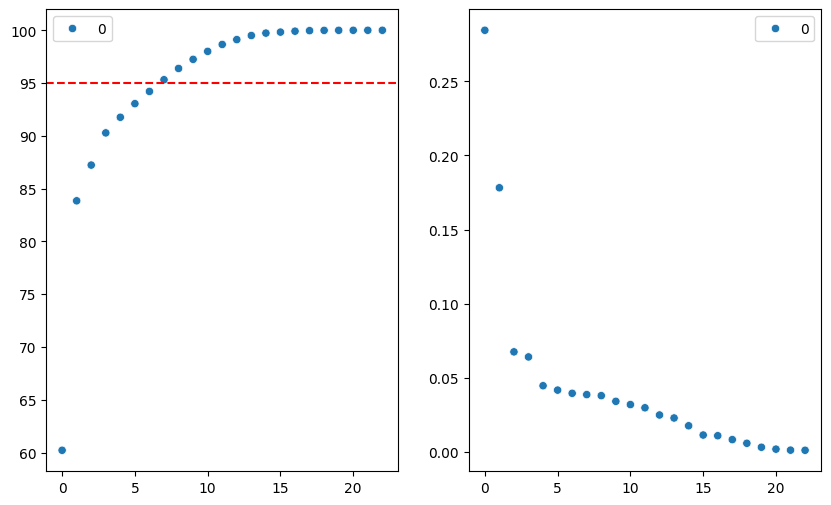

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
sb.scatterplot(ax=axes[0], data=preserved_variance)
axes[0].axhline(y=95, color='r', linestyle='--')
sb.scatterplot(ax=axes[1], data=eigenvalue)
plt.show()

In [36]:
pca = PCA(n_components=8)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X), columns=[str(i) for i in range(8)])

The follow code section do the same thing as the previous. It is an way to undersant how PCA works.

I just did that to see if when I build the model $PCA(n\_components=n)$ is the samething to apply the PCA to entire dataset and project the data in the first $n$ vetors.
Definitely it did.

In [52]:
X_pca_projected = X.dot(exp_pca.components_[range(8)].T)

#### PCA Ploted

In order to provide insights into how the data is distributed in the reduced-dimensional space defined, I created the following charts.

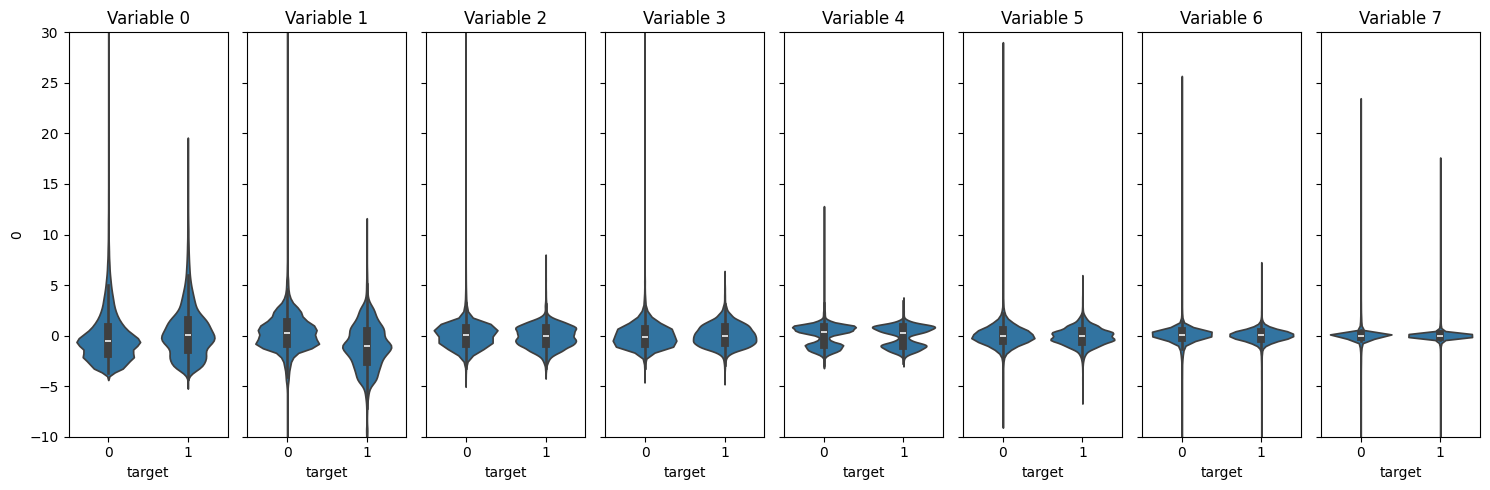

In [45]:
df = X_pca.copy()
df['target'] = y

num_features = df.shape[1] - 1
fig, axes = plt.subplots(1, num_features, figsize=(15, 5), sharey=True)

for i, (feature, data) in enumerate(X_pca.items()):
    sb.violinplot(data=df, x='target', y=feature, ax=axes[i])
    axes[i].set_title("Variable " + str(i))

plt.tight_layout()
plt.ylim(-10, 30)
plt.show()

### Linear Discriminant Analysis

LDA is a technique for feature reduction that aims to separate samples of distinct groups by placing them in a space that maximizes their between-class separability while minimizing their within-class variability.

Unlike PCA, which focuses solely on maximizing variance, LDA considers the class labels of the samples. It seeks to find a linear combination of features that best separates the classes in the dataset. This linear combination, known as discriminant functions, serves as the basis for projecting the data into a lower-dimensional space.

By maximizing the separation between classes and minimizing the dispersion within each class, LDA facilitates the creation of more distinct and well-separated clusters in the reduced-dimensional space. This process enhances the discriminative power of the features, making them more effective for classification tasks.

In [51]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X, y)
X_lda = pd.DataFrame(LDA.transform(X))

,0
0,1.769746
1,-0.331179
2,0.059968
3,0.260032
4,-0.162203
...,...
29995,-0.397878
29996,-0.741867
29997,3.708099
29998,0.507907


# Data Classification

After completing all the preprocessing steps, including feature selection, reduction, and normalization, the next step is to build appropriate models for classifying the data.

In this phase, various classification algorithms will be explored and evaluated to determine the most suitable approach for the dataset. These algorithms may include but are not limited to:
- MDC with euclidean distance
- MDC with mahalanobis distance
- Fisher LDA

## Minimum Distance Classifier

The MDC is a simple yet classification algorithm that operates by calculating the mean point of each class and classifying a new object based on the minimum distance between the object and the class mean points. 
The MDC is particularly useful for datasets with well-separated classes and Gaussian distributions.

In the context of MDC, it is possible to use any distance measure. For this propose distance measures used was: Euclidean and Mahalanobis distance.

In [116]:
class MinimumDistanceClassifierMahalanobis:
    def __init__(self):
        self.centroids = {}
        self.covariances = {}

    def fit(self, X_train, y_train):
        self.centroids = {c: X_train[y_train == c].mean() for c in np.unique(y_train)}
        self.covariances = {c: X_train[y_train == c].cov() for c in np.unique(y_train)}

    def predict(self, X_test):
        predictions = [
            min(
                self.centroids.keys(),
                key=lambda c: np.sqrt((x - self.centroids[c]) @ np.linalg.inv(self.covariances[c]) @ (x - self.centroids[c]))
            )
            for _, x in X_test.iterrows()
        ]
        return predictions
    
    def get_key(self):
        return self.centroids.keys()

In [117]:
euclidean_error = {
    'f1_score': [],
    'accuracy_score': [],
    'recall_score': [],
    'precision_score': []
}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    MDC = NearestCentroid(metric='euclidean')
    MDC.fit(X_train, y_train)
    predictions = MDC.predict(X_test)
    
    euclidean_error["f1_score"].append(f1_score(predictions, y_test))
    euclidean_error["accuracy_score"].append(accuracy_score(predictions, y_test))
    euclidean_error["recall_score"].append(recall_score(predictions, y_test))
    euclidean_error["precision_score"].append(precision_score(predictions, y_test))

euclidean_error = pd.DataFrame(euclidean_error, columns=euclidean_error.keys())

In [118]:
mahalanobis_error = {
    'f1_score': [],
    'accuracy_score': [],
    'recall_score': [],
    'precision_score': []
}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    MMDC = MinimumDistanceClassifierMahalanobis()
    MMDC.fit(X_train, y_train)
    predictions = MMDC.predict(X_test)
    
    mahalanobis_error["f1_score"].append(f1_score(predictions, y_test))
    mahalanobis_error["accuracy_score"].append(accuracy_score(predictions, y_test))
    mahalanobis_error["recall_score"].append(recall_score(predictions, y_test))
    mahalanobis_error["precision_score"].append(precision_score(predictions, y_test))

mahalanobis_error = pd.DataFrame(mahalanobis_error, columns=mahalanobis_error.keys())

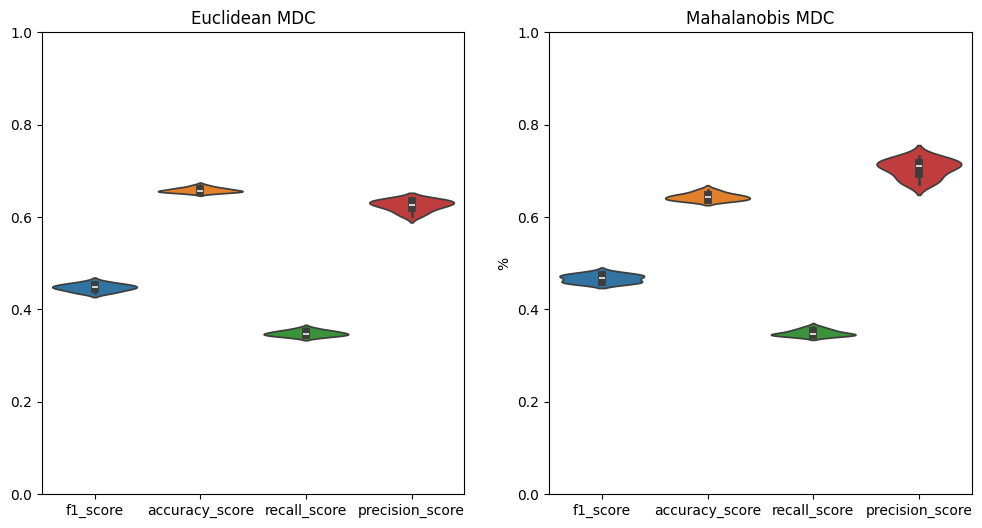

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.violinplot(ax=axes[0], data=euclidean_error)
sb.violinplot(ax=axes[1], data=mahalanobis_error)

axes[0].set_title("Euclidean MDC")
axes[1].set_title("Mahalanobis MDC")
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)

plt.ylabel("%")
plt.show()

In [123]:
print("### EUCLIDEAN ###")
print("       F1_score:", euclidean_error["f1_score"].mean())
print(" Accuracy_score:", euclidean_error["accuracy_score"].mean())
print("   Recall_score:", euclidean_error["recall_score"].mean())
print("Precision_score:", euclidean_error["precision_score"].mean())
print("### MAHALANOBIS ###")
print("       F1_score:", mahalanobis_error["f1_score"].mean())
print(" Accuracy_score:", mahalanobis_error["accuracy_score"].mean())
print("   Recall_score:", mahalanobis_error["recall_score"].mean())
print("Precision_score:", mahalanobis_error["precision_score"].mean())

### EUCLIDEAN ###
       F1_score: 0.44732642130938877
 Accuracy_score: 0.6582666666666667
   Recall_score: 0.34822372588352396
Precision_score: 0.625320271288621
### MAHALANOBIS ###
       F1_score: 0.4668678216067286
 Accuracy_score: 0.6438666666666667
   Recall_score: 0.3490325907746933
Precision_score: 0.705124340617935


##  Feature Reduction with PCA and Classification with MDC

In [122]:
pca_euclidean_error = {
    'f1_score': [],
    'accuracy_score': [],
    'recall_score': [],
    'precision_score': []
}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=i, stratify=y)

    MDC = NearestCentroid(metric='euclidean')
    MDC.fit(X_train, y_train)
    predictions = MDC.predict(X_test)
    
    pca_euclidean_error["f1_score"].append(f1_score(predictions, y_test))
    pca_euclidean_error["accuracy_score"].append(accuracy_score(predictions, y_test))
    pca_euclidean_error["recall_score"].append(recall_score(predictions, y_test))
    pca_euclidean_error["precision_score"].append(precision_score(predictions, y_test))

pca_euclidean_error = pd.DataFrame(pca_euclidean_error, columns=pca_euclidean_error.keys())

In [125]:
pca_mahalanobis_error = {
    'f1_score': [],
    'accuracy_score': [],
    'recall_score': [],
    'precision_score': []
}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=i, stratify=y)

    MMDC = MinimumDistanceClassifierMahalanobis()
    MMDC.fit(X_train, y_train)
    predictions = MMDC.predict(X_test)
    
    pca_mahalanobis_error["f1_score"].append(f1_score(predictions, y_test))
    pca_mahalanobis_error["accuracy_score"].append(accuracy_score(predictions, y_test))
    pca_mahalanobis_error["recall_score"].append(recall_score(predictions, y_test))
    pca_mahalanobis_error["precision_score"].append(precision_score(predictions, y_test))

pca_mahalanobis_error = pd.DataFrame(pca_mahalanobis_error, columns=pca_mahalanobis_error.keys())

In [126]:
print("### EUCLIDEAN ###")
print("       F1_score:", pca_euclidean_error["f1_score"].mean())
print(" Accuracy_score:", pca_euclidean_error["accuracy_score"].mean())
print("   Recall_score:", pca_euclidean_error["recall_score"].mean())
print("Precision_score:", pca_euclidean_error["precision_score"].mean())
print("### MAHALANOBIS ###")
print("       F1_score:", pca_mahalanobis_error["f1_score"].mean())
print(" Accuracy_score:", pca_mahalanobis_error["accuracy_score"].mean())
print("   Recall_score:", pca_mahalanobis_error["recall_score"].mean())
print("Precision_score:", pca_mahalanobis_error["precision_score"].mean())

### EUCLIDEAN ###
       F1_score: 0.43682725501983244
 Accuracy_score: 0.641
   Recall_score: 0.33446293666007026
Precision_score: 0.6295403165033912
### MAHALANOBIS ###
       F1_score: 0.4336077310291369
 Accuracy_score: 0.6425
   Recall_score: 0.33395723248139786
Precision_score: 0.6187641296156744


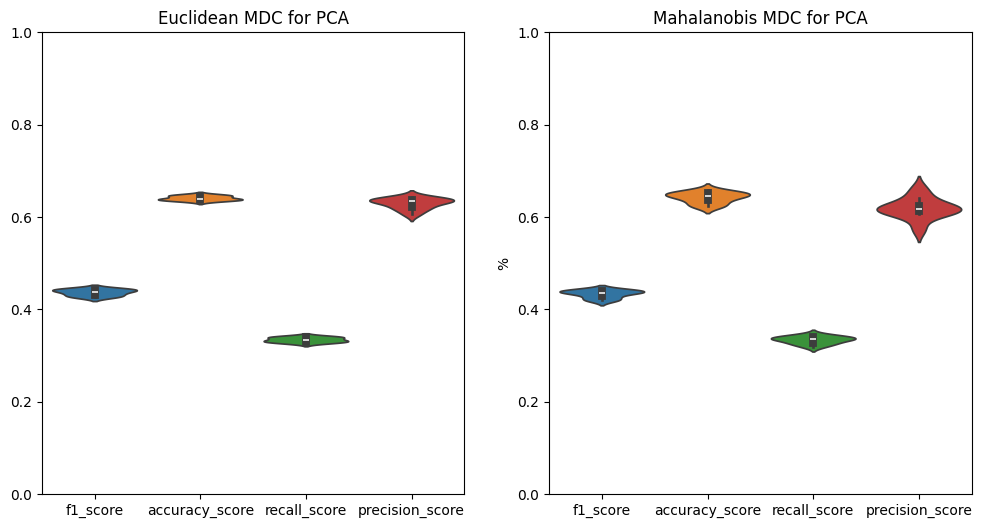

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.violinplot(ax=axes[0], data=pca_euclidean_error)
sb.violinplot(ax=axes[1], data=pca_mahalanobis_error)

axes[0].set_title("Euclidean MDC for PCA")
axes[1].set_title("Mahalanobis MDC for PCA")
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)

plt.ylabel("%")
plt.show()

## Fisher LDA

In [128]:
lda_error = {
    'f1_score': [],
    'accuracy_score': [],
    'recall_score': [],
    'precision_score': []
}

for i in range(30):
    X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(X_lda, y, test_size=0.2, random_state=i, stratify=y)

    MDC = NearestCentroid()
    MDC.fit(X_lda_train, y_lda_train)
    predictions_lda = MDC.predict(X_lda_test)
    
    lda_error["f1_score"].append(f1_score(predictions_lda, y_lda_test))
    lda_error["accuracy_score"].append(accuracy_score(predictions_lda, y_lda_test))
    lda_error["recall_score"].append(recall_score(predictions_lda, y_lda_test))
    lda_error["precision_score"].append(precision_score(predictions_lda, y_lda_test))
lda_error = pd.DataFrame(lda_error, columns=lda_error.keys())

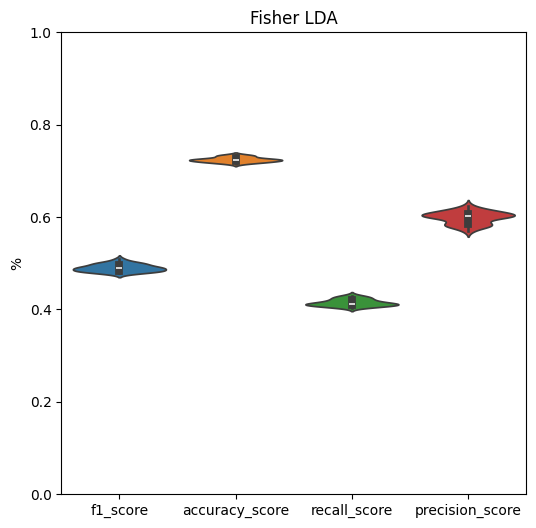

In [129]:
plt.figure(figsize=(6,6))

sb.violinplot(lda_error)

plt.title("Fisher LDA")
plt.ylabel("%")
plt.ylim(0,1)
plt.show()

In [113]:
print("### Fisher LDA ###")
print("       F1_score:", lda_error["f1_score"].mean())
print(" Accuracy_score:", lda_error["accuracy_score"].mean())
print("   Recall_score:", lda_error["recall_score"].mean())
print("Precision_score:", lda_error["precision_score"].mean())


### Fisher LDA ###
       F1_score: 0.48995308695117323
 Accuracy_score: 0.7242944444444444
   Recall_score: 0.4146856544690631
Precision_score: 0.5987691534790255


##  Feature Reduction with K-S and Classification with MDC

In [130]:
ks_features = rank[0][rank[1] > 5000]

ks_error = {
    'f1_score': [],
    'accuracy_score': [],
    'recall_score': [],
    'precision_score': []
}

for i in range(30):
    X_ks_train, X_ks_test, y_ks_train, y_ks_test = train_test_split(X[ks_features], y, test_size=0.2, random_state=i, stratify=y)

    MDC = NearestCentroid()
    MDC.fit(X_ks_train, y_ks_train)
    predictions_lda = MDC.predict(X_ks_test)
    
    ks_error["f1_score"].append(f1_score(predictions_lda, y_ks_test))
    ks_error["accuracy_score"].append(accuracy_score(predictions_lda, y_ks_test))
    ks_error["recall_score"].append(recall_score(predictions_lda, y_ks_test))
    ks_error["precision_score"].append(precision_score(predictions_lda, y_ks_test))
ks_error = pd.DataFrame(ks_error, columns=ks_error.keys())

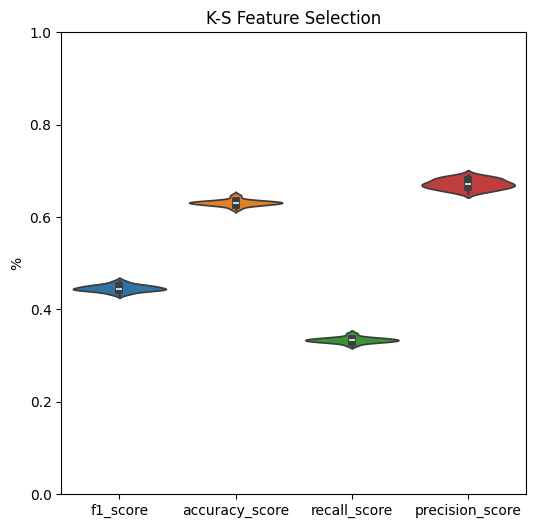

In [132]:
plt.figure(figsize=(6,6))

sb.violinplot(ks_error)

plt.title("K-S Feature Selection")
plt.ylabel("%")
plt.ylim(0,1)
plt.show()

In [131]:
print("### K-S Feature Selection ###")
print("       F1_score:", ks_error["f1_score"].mean())
print(" Accuracy_score:", ks_error["accuracy_score"].mean())
print("   Recall_score:", ks_error["recall_score"].mean())
print("Precision_score:", ks_error["precision_score"].mean())

### K-S Feature Selection ###
       F1_score: 0.4458805959131919
 Accuracy_score: 0.6308777777777779
   Recall_score: 0.33377984112262304
Precision_score: 0.6714393368500376


## Objective Classifiers

In [134]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

In [135]:
models = {
    LogisticRegression(): "  Logistic Regression",
    SVC():                "Suport Vector Machine",
    MLPClassifier():      "       Neural Network"
}

for model in models.keys():
    model.fit(X_train, y_train)

/home/joaomoreira/project/RP-Project/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
for model, name in models.items():
    print("###", name, "###")
    print("        F1_score: {:.4f}%".format(f1_score(model.predict(X_test), y_test) * 100))
    print("  Accuracy_score: {:.4f}%".format(accuracy_score(model.predict(X_test), y_test) * 100))
    print("    Recall_score: {:.4f}%".format(recall_score(model.predict(X_test), y_test) * 100))
    print(" Precision_score: {:.4f}%".format(precision_score(model.predict(X_test), y_test) * 100))

###   Logistic Regression ###
        F1_score: 35.9389%
  Accuracy_score: 80.9867%
    Recall_score: 70.5467%
 Precision_score: 24.1109%
### Suport Vector Machine ###
        F1_score: 44.9142%
  Accuracy_score: 81.5867%
    Recall_score: 66.3915%
 Precision_score: 33.9361%
###        Neural Network ###
        F1_score: 47.4804%
  Accuracy_score: 81.2400%
    Recall_score: 62.3529%
 Precision_score: 38.3363%
